**Simple Linear Regression**

Simple linear regression provides a model of the relationship between the magnitude of one variable and that of a second—for example, as X increases, Y also increases. Or as X increases, Y decreases.1 Correlation is another way to measure how two variables are related—see the section “Correlation” on page 30. The difference is that while correlation measures the strength of an association between two variables regression quantifies the nature of the relationship.



regresion lineal simple poblacion vs regresion lineal simple muestra

**La regresión lineal poblacional** se refiere al modelo teórico que describe la relación entre las variables en toda la población. Este modelo no se puede observar directamente, ya que implica conocer todos los datos de la población

**La regresión lineal muestral**, en cambio, se basa en una muestra de la población y estima la relación entre las variables dentro de esa muestra.




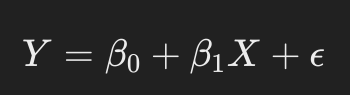

Y, independent variable

X, dependent variable

bo, intercept

b1, coefficient or slope of X

E, Término de error, que representa la variabilidad de 𝑌 que no puede ser explicada por 𝑋

**_Diferencias Clave_**

**Acceso a Datos:**

_Poblacional:_ Considera todos los datos posibles de la población completa, lo cual es generalmente imposible en la práctica.

_Muestral:_ Se basa en una muestra de la población, que es una selección parcial y más manejable de datos.

**Parámetros:**

_Poblacional:_ Los parámetros 𝛽o y 𝛽1 son constantes verdaderas que describen la relación en toda la población.

_Muestral:_ Los parámetros 𝑏o y 𝑏1 son estimaciones de 𝛽o y 𝛽1

**Errores:**

_Poblacional:_ El término de error 𝜖 refleja la variabilidad en 𝑌 que no puede ser explicada por X en toda la población.

_Muestral:_ Los errores residuales en la regresión muestral son las diferencias entre los valores observados y los valores predichos por el modelo muestral.

**Inferencia Estadística:**

_Poblacional:_ No requiere inferencia, ya que considera todos los datos posibles.

_Muestral:_ Utiliza técnicas inferenciales (como pruebas de hipótesis y intervalos de confianza) para hacer afirmaciones sobre la población basadas en la muestra.

 
​
Manual formulas

**calculo coeficientes de la regresion**

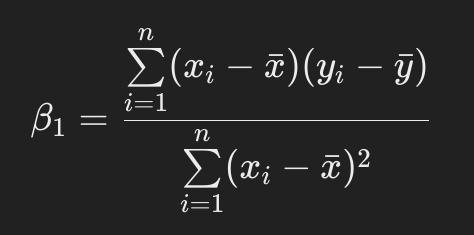

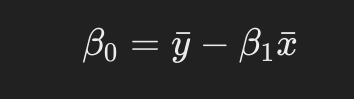

**nivel de ajuste, cuanto % de la variabilidad de y puede ser explicada por x**

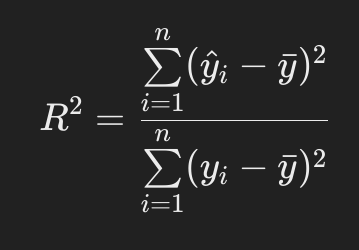

**predicciones y residuos**

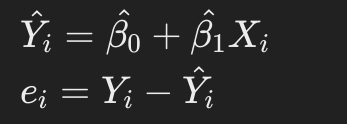

**calculo del error estandar de los coeficientes**

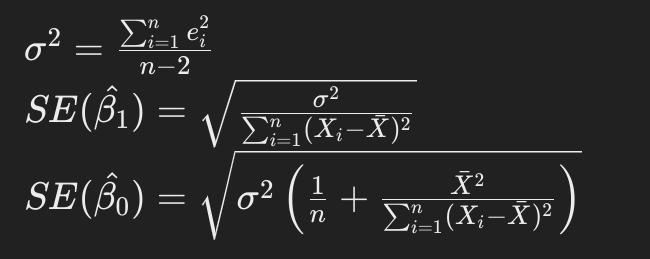

**calculo valor t y Y los p-valores se obtienen usando la distribución t de Student con 𝑛−2 grados de libertad**

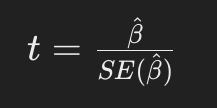

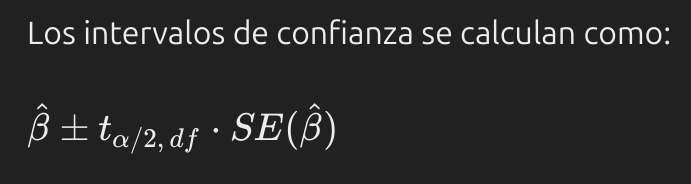

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


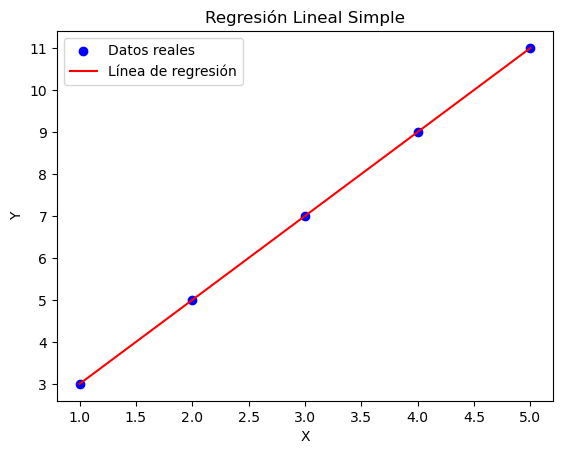

In [2]:
# Datos de ejemplo (x, y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])
# Crear el objeto de modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos
model.fit(x.reshape(-1, 1), y)

# Hacer predicciones
y_pred = model.predict(x.reshape(-1, 1))

# Visualizar los datos originales y la línea de regresión
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x, y_pred, color='red', label='Línea de regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()



In [3]:
#evaluar el modelo, r cuadrada muestra que tanto tan bien se ajustan los datos (valores de 0 a 1)
r2_score = model.score(x.reshape(-1,1), y)
print(f'R^2: {r2_score}')

R^2: 1.0


**Ejemplo con un dataframe (siniestralidad)**

In [4]:
import pandas as pd

Transformar los precios a una escala logarítmica en un modelo de regresión lineal simple es útil en varios contextos, especialmente cuando se estima la tasa de crecimiento o inflación. Aquí hay algunas razones clave para esta transformación:

1. Relación No Lineal
Muchas variables económicas y financieras (como los precios) no crecen linealmente con el tiempo, sino que crecen exponencialmente. Transformar los precios a una escala logarítmica permite capturar esta naturaleza exponencial de crecimiento en un modelo lineal, lo que facilita el análisis y la interpretación de los resultados.

2. Homocedasticidad
La regresión lineal asume que los residuos (errores) del modelo tienen varianza constante (homocedasticidad). En datos económicos, la variabilidad de los precios puede aumentar con el tiempo. Al tomar el logaritmo de los precios, se puede estabilizar la varianza y hacer que los residuos del modelo sean más uniformes.

3. Interpretación de Coeficientes
En un modelo de regresión lineal con precios logarítmicos, el coeficiente de la variable independiente (tiempo) puede interpretarse directamente como la tasa de crecimiento porcentual. Esto se debe a que la derivada de un logaritmo natural da la tasa de cambio relativa. Por ejemplo, si el coeficiente es 0.05, se puede interpretar como un crecimiento del 5% anual.

4. Reducción de Sesgo
Transformar a escala logarítmica puede ayudar a reducir el sesgo en los datos que tienen una distribución sesgada. Los precios pueden tener distribuciones que no son simétricas, y el uso del logaritmo puede hacer que la distribución de los datos sea más cercana a una distribución normal, lo cual es una de las suposiciones de la regresión lineal.

In [5]:
sin=pd.read_csv('SIN.csv')
sin.head()

,DATE,ASEGURADOS,SEVERIDAD,MORBILIDAD
0,01/02/2010,2629,31143,2%
1,01/03/2010,2606,24817,2%
2,01/04/2010,2574,36571,2%
3,01/05/2010,2571,16972,2%
4,01/06/2010,2585,18472,2%


In [6]:
sec=list(range(1,sin['SEVERIDAD'].count()+1))


In [7]:
sin['sec']=sec
sin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        105 non-null    object
 1   ASEGURADOS  105 non-null    int64 
 2   SEVERIDAD   105 non-null    int64 
 3   MORBILIDAD  105 non-null    object
 4   sec         105 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.2+ KB


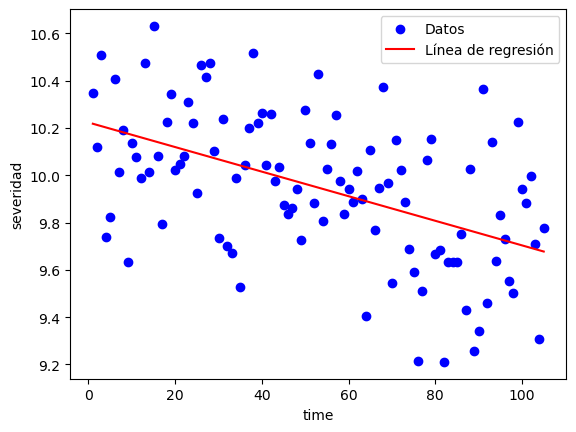

In [10]:
x=sin[['sec']]
y=np.log(sin['SEVERIDAD'])
model=LinearRegression()
model.fit(x,y)
yest=model.predict(x)
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, yest, color='red', label='Línea de regresión')
plt.xlabel('time')
plt.ylabel('severidad')
plt.legend()
plt.show()


In [140]:
#tasa de crecimiento o inflacion (anual)
coef=model.coef_[0]
inf=(np.exp(coef)-1)*100*12
inf

-6.221048093525017

In [86]:
#evaluar el modelo, r cuadrada muestra que tanto tan bien se ajustan los datos
r2_score = model.score(x, y)
print(f'R^2: {r2_score}')

R^2: 0.25523468823957185


In [87]:
model.intercept_

10.223425597206694

In [88]:
model.coef_[0]

-0.005197691369301049

In [12]:
#recorer y guardar datos en celdas de un df

for x in range(0,len(sin)-1):

     tasa=(sin['SEVERIDAD'].iloc[x+1]/sin['SEVERIDAD'].iloc[x]-1)*100
     sin.loc[x+1,'tasa']=tasa

sin['yestnorm']=np.exp(yest)
sin.tail()  

,DATE,ASEGURADOS,SEVERIDAD,MORBILIDAD,sec,tasa,yestnorm
100,01/06/2018,2640,19578,2%,101,-6.015074,16292.477365
101,01/07/2018,2640,21981,2%,102,12.273981,16208.013794
102,01/08/2018,2641,16448,1%,103,-25.171739,16123.988099
103,01/09/2018,2641,11045,2%,104,-32.848979,16040.398012
104,01/10/2018,2642,17603,1%,105,59.375283,15957.241272


**Agregando intervalos de confianza y prueba estadistica de la significancia de la regresion**

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

In [62]:
#generacion de datos

np.random.seed(0)
n = 100
X = np.random.rand(n) * 10
Y = 2.5 * X + np.random.randn(n) * 2
data = pd.DataFrame({'X': X, 'Y': Y})

In [63]:
#calculo de medias
X_mean = np.mean(data['X'])
Y_mean = np.mean(data['Y'])

In [64]:
#calculo de coeficiente e intercepto

numerator = np.sum((data['X'] - X_mean) * (data['Y'] - Y_mean))
denominator = np.sum((data['X'] - X_mean) ** 2)
beta_1 = numerator / denominator
beta_0 = Y_mean - beta_1 * X_mean

In [65]:
# calculo y estimada y residuos
data['Y_pred'] = beta_0 + beta_1 * data['X']
data['residuals'] = data['Y'] - data['Y_pred']
data.head()

,X,Y,Y_pred,residuals
0,5.488135,11.390038,14.095418,-2.705380
1,7.151894,19.681387,18.233830,1.447558
2,6.027634,16.000409,15.437360,0.563049
3,5.448832,10.549592,13.997656,-3.448063
4,4.236548,13.567874,10.982237,2.585638


In [68]:
#calculo error estandar de los residuos (el error estandar cuantifica las oscilaciones de la media muestral alredeor de la media poblacional)
squared_residuals = np.sum(data['residuals'] ** 2)
sigma_squared = squared_residuals / (n - 2)
sigma = np.sqrt(sigma_squared)


In [69]:
#Error estandar del incercepto y del coeficiente

SE_beta_1 = sigma / np.sqrt(denominator)
SE_beta_0 = sigma * np.sqrt(1/n + X_mean**2 / denominator)

In [70]:
# nivel de significancia para 95% de confianza

alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df=n-2)

In [71]:
#calculo de los valores de Y en los extremos de los intervalos de confianza
confidence_interval_upper = data['Y_pred'] + t_critical * sigma * np.sqrt(1/n + (data['X'] - X_mean)**2 / denominator)
confidence_interval_lower = data['Y_pred'] - t_critical * sigma * np.sqrt(1/n + (data['X'] - X_mean)**2 / denominator)



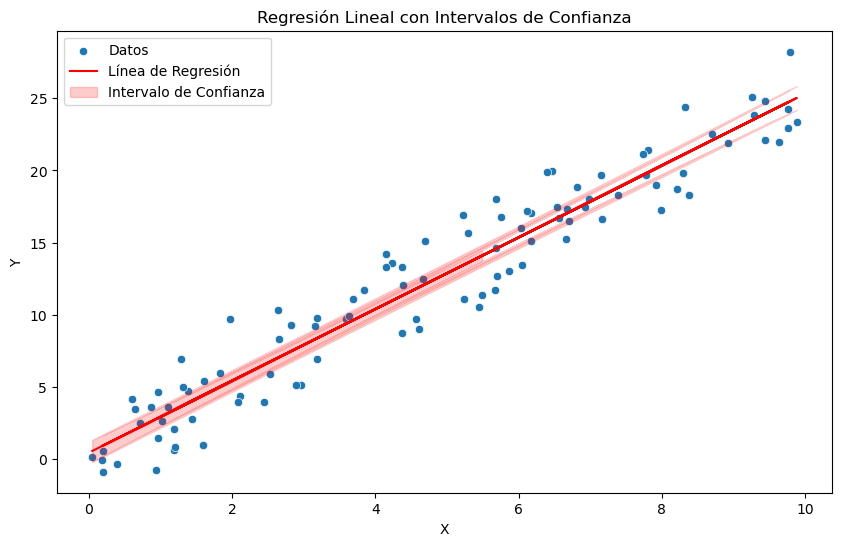

In [72]:
# Crear el gráfico

plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=data, label='Datos')
plt.plot(data['X'], data['Y_pred'], color='red', label='Línea de Regresión')
plt.fill_between(data['X'], confidence_interval_lower, confidence_interval_upper, color='red', alpha=0.2, label='Intervalo de Confianza')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal con Intervalos de Confianza')
plt.legend()
plt.show()


**Agregando una prueba estadistica de la significancia de la regresion**

Para agregar una prueba estadística de la significancia de la regresión en el ejemplo anterior, necesitamos realizar una prueba de hipótesis sobre los coeficientes del modelo. La prueba más común es verificar si el coeficiente de la pendiente (𝑏1) es significativamente diferente de cero, lo cual indicaría que existe una relación lineal entre la variable independiente 𝑋 y la variable dependiente 𝑌.

Hipótesis

Hipótesis nula (𝐻0): 𝛽1=0 (No hay relación lineal entre 𝑋 y 𝑌)

Hipótesis alternativa (𝐻1): 𝛽1≠0 (Existe una relación lineal entre 𝑋 y 𝑌)

Procedimiento
Calcular los coeficientes de la regresión muestral: Ya lo hemos hecho.

Calcular el error estándar de los coeficientes: Ya lo hemos hecho.

Calcular el valor t: Se calcula como el coeficiente dividido por su error estándar.

Calcular el p-valor: Basado en la distribución t con 𝑛−2 grados de libertad.

Determinar la significancia: Si el p-valor es menor que el nivel de significancia (típicamente 0.05), rechazamos la hipótesis nula.

In [73]:
# Ajustar modelo de regresión lineal muestral
X_with_const = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X_with_const).fit()

In [74]:
# Obtener los parámetros estimados
b0, b1 = model.params

In [75]:
# Calcular el valor t y el p-valor
t_beta_1 = model.tvalues[1]
p_beta_1 = model.pvalues[1]

/tmp/ipykernel_3900/2227107214.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_beta_1 = model.tvalues[1]
/tmp/ipykernel_3900/2227107214.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_beta_1 = model.pvalues[1]


In [76]:
# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1270.
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           6.76e-58
Time:                        23:04:49   Log-Likelihood:                -210.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      98   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4443      0.387      1.149      0.2

/tmp/ipykernel_3900/533554837.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.fill_between(data['X'], model.fittedvalues - 1.96 * model.bse[1], model.fittedvalues + 1.96 * model.bse[1], color='red', alpha=0.2, label='Intervalo de Confianza')


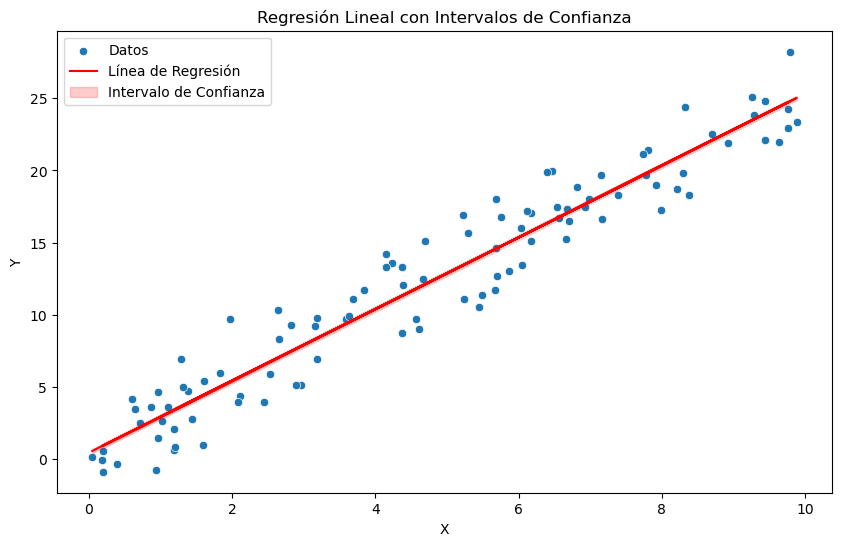

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=data, label='Datos')
plt.plot(data['X'], model.fittedvalues, color='red', label='Línea de Regresión')
plt.fill_between(data['X'], model.fittedvalues - 1.96 * model.bse[1], model.fittedvalues + 1.96 * model.bse[1], color='red', alpha=0.2, label='Intervalo de Confianza')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal con Intervalos de Confianza')
plt.legend()
plt.show()

In [82]:
# Imprimir los resultados de la prueba de significancia
print(f"t-value for beta_1: {t_beta_1}")
print(f"p-value for beta_1: {p_beta_1}")

t-value for beta_1: 35.63047638277383
p-value for beta_1: 6.76378406035366e-58


In [83]:
# Determinar la significancia
alpha = 0.05
if p_beta_1 < alpha:
    print(f"El coeficiente de la pendiente es significativo (p < {alpha}). Rechazamos H0.")
else:
    print(f"El coeficiente de la pendiente no es significativo (p >= {alpha}). No podemos rechazar H0.")

El coeficiente de la pendiente es significativo (p < 0.05). Rechazamos H0.
